In [1]:
import gzip
import numpy as np
import sklearn
import matplotlib as plt

# Import files using gzip
def load_fashion():
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [2]:
train_images, train_labels, test_images, test_labels = load_fashion()

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, Binarizer
import sklearn.pipeline
import sklearn.utils

# Take smaller sample to look for errors for testing
# samp_X, samp_Y = sklearn.utils.shuffle(train_images, train_labels, n_samples = 12000)

classifier = sklearn.pipeline.make_pipeline(StandardScaler(), SGDClassifier(max_iter = 1500, tol = 1e-3, alpha=0.001), verbose=True) 
# Default reg. is L2, default alpha is 0.0001
classifier.fit(train_images, train_labels)
# classifier.fit(samp_X, samp_Y)

predictions = classifier.predict(test_images)
acc_score = sklearn.metrics.accuracy_score(test_labels, predictions)
print(acc_score)

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   1.0s
[Pipeline] ......... (step 2 of 3) Processing binarizer, total=   0.5s
[Pipeline] ..... (step 3 of 3) Processing sgdclassifier, total=  23.0s
0.8107


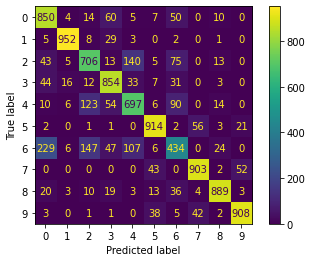

In [29]:
# Confusion Matrix

sklearn.metrics.plot_confusion_matrix(classifier, test_images, test_labels)